Dataset: https://www.kaggle.com/mohansacharya/graduate-admissions/home

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [33]:
df = pd.read_csv("../input/graduate-admissions/Admission_Predict_Ver1.1.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
# Identify the datatypes and shape of the dataset
print(df.dtypes)
print(df.shape)

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object
(500, 9)


In [34]:
# Dropping "serial No" from our dataset
df.drop(["Serial No."], axis=1, inplace=True)
df.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [7]:
# To get Statistical Summary
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
df.Research.value_counts()

1    280
0    220
Name: Research, dtype: int64

In [9]:
pd.unique(df["TOEFL Score"])

array([118, 107, 104, 110, 103, 115, 109, 101, 102, 108, 106, 111, 112,
       105, 114, 116, 119, 120,  98,  93,  99,  97, 117, 113, 100,  95,
        96,  94,  92])

In [10]:
# Unique Values
df.nunique()

GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [11]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [12]:
# To find null Values
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [67]:
# To find out the impact of having a rating of 3+ in "SOP"
predict = df[df['Chance of Admit '] > 0.8]
predict.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
5,330,115,5,4.5,3.0,9.34,1,0.90
11,327,111,4,4.0,4.5,9.00,1,0.84
22,328,116,5,5.0,5.0,9.50,1,0.94
23,334,119,5,5.0,4.5,9.70,1,0.95
24,336,119,5,4.0,3.5,9.80,1,0.97
25,340,120,5,4.5,4.5,9.60,1,0.94
32,338,118,4,3.0,4.5,9.40,1,0.91
33,340,114,5,4.0,4.0,9.60,1,0.90
34,331,112,5,4.0,5.0,9.80,1,0.94


(array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,
         0.,  0., 11.,  0.,  0.,  0.,  0., 42.,  0.,  0.,  0.,  0., 45.,
         0.,  0.,  0., 36.]),
 array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2,
        3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5,
        4.6, 4.7, 4.8, 4.9, 5. ]),
 <BarContainer object of 30 artists>)

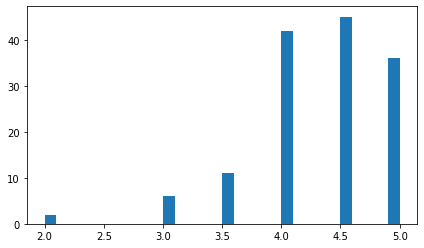

In [68]:
plt.figure(figsize=(7,4))
plt.hist(x=predict["SOP"], bins=30)

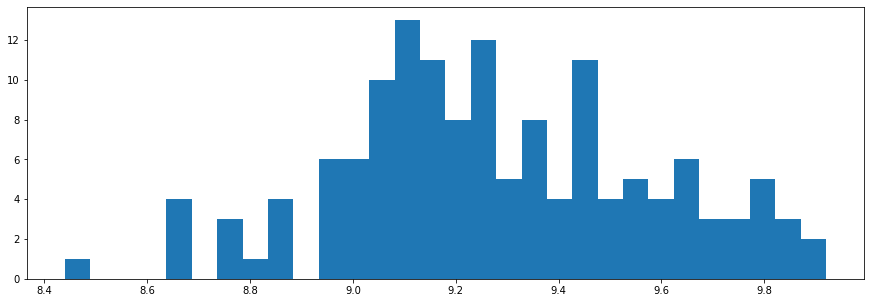

In [69]:
plt.figure(figsize=(15,5))
plt.hist(x=predict["CGPA"], bins=30)
plt.show()

**Students who are having 0.80% chance of admit above, averagely have 4.5 rating in SOP and 9.0 + CGPA. So can assume that "SOP" and CPA are considered important in evaluating a students profile. ** 

In [70]:
# To know the relationship between CGPA and Chance of getting an Admit
chance_predict = df[(df["Chance of Admit "] >= 0.6) & (df["CGPA"] >= 8.5)]
chance_predict

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
3,322,110,3,3.5,2.5,8.67,1,0.80
5,330,115,5,4.5,3.0,9.34,1,0.90
11,327,111,4,4.0,4.5,9.00,1,0.84
...,...,...,...,...,...,...,...,...
489,302,110,3,4.0,4.5,8.50,0,0.65
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93


<Figure size 1440x360 with 0 Axes>

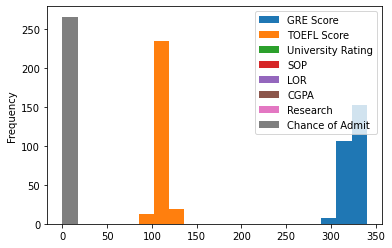

In [72]:
# To know the average TOEFL and GRE scores
plt.figure(figsize=(20,5))
chance_predict.plot.hist(bins=20)
plt.show()

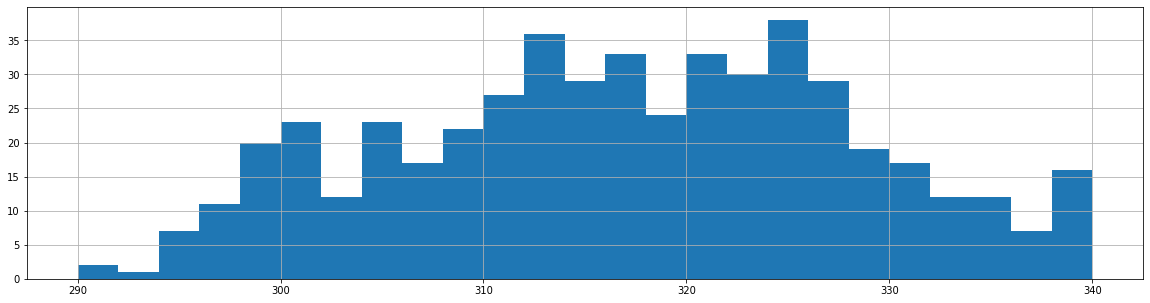

In [73]:
plt.figure(figsize=(20,5))
df['GRE Score'].hist(bins=25)
plt.show()

<AxesSubplot:xlabel='SOP'>

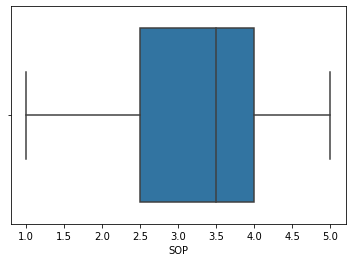

In [18]:
sns.boxplot(x=df["SOP"])

<AxesSubplot:xlabel='LOR '>

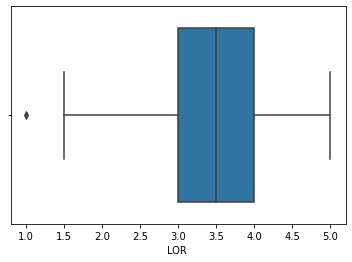

In [19]:
# To check for outliers
sns.boxplot(x=df["LOR "])

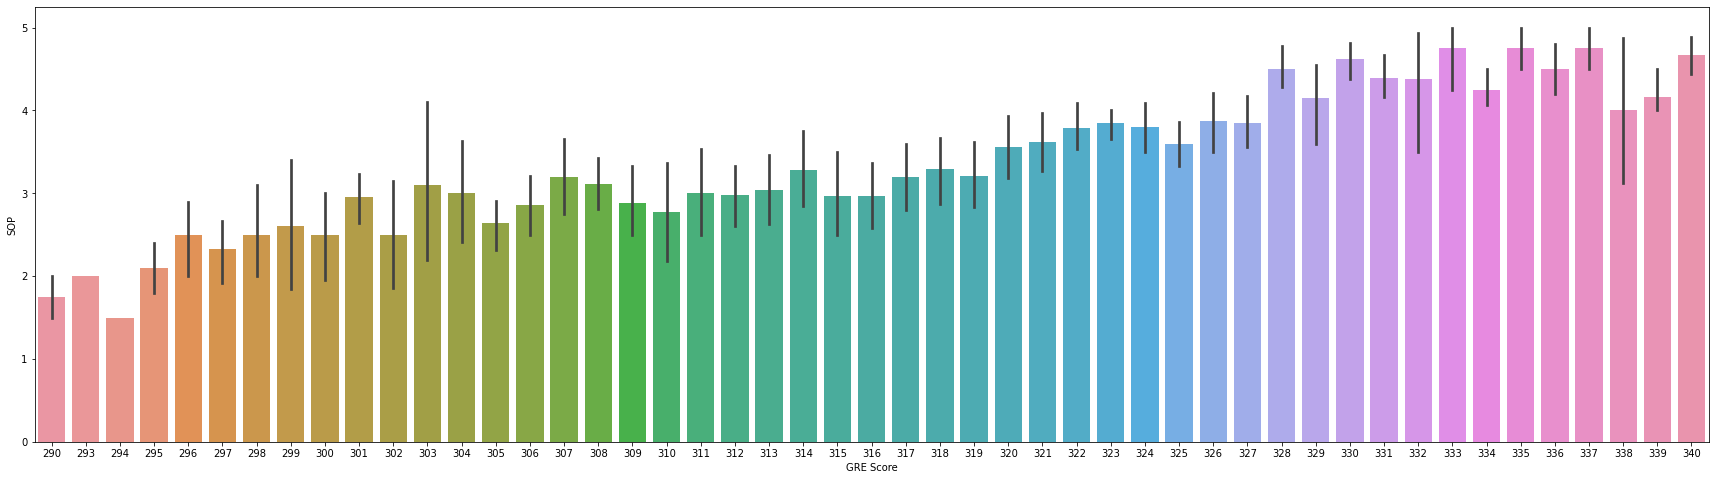

In [74]:
# To know the average SOP rating of students with different GRE scores.
plt.figure(figsize=(30,8))
sns.barplot(df['GRE Score'],df['SOP'])
plt.show()

****Here we can assume that students with higher GRE Scores generally tend to write the SOP much better and have better ratings when compared with students with GRE score 320 or below.

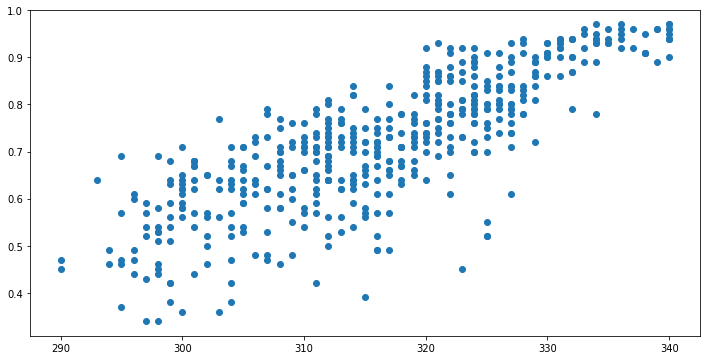

In [21]:
# Scatter plot for distribution between GRE score and % of Admit
plt.figure(figsize=(12,6))
plt.scatter(df['GRE Score'],df["Chance of Admit "])
plt.show()

<AxesSubplot:xlabel='Research', ylabel='count'>

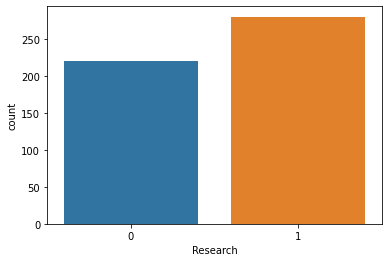

In [75]:
sns.countplot(df["Research"])

So, majorly speaking applicants atleast have 1 research paper.

<AxesSubplot:>

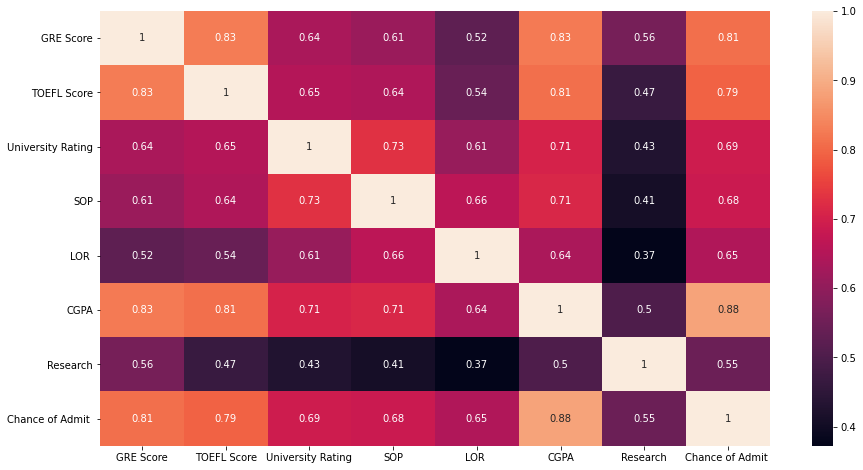

In [77]:
# Correlation Between all the variables in our dataset
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='SOP', ylabel='Density'>

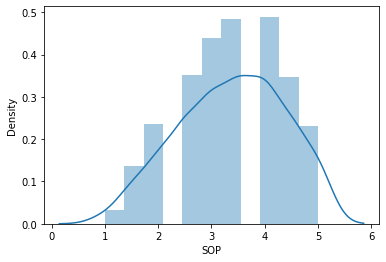

In [24]:
sns.distplot(df['SOP'], kde=True)

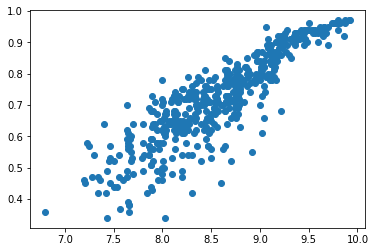

In [25]:
plt.scatter(x=df['CGPA'], y=df['Chance of Admit '])

In [81]:
# Creating Training Amd Testing Dataset.
X = pd.DataFrame(np.c_[df['GRE Score'], df['TOEFL Score'], df['University Rating'], df['SOP'], df['LOR '], df['CGPA'], df['Research']], columns = ['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research'])
Y = df['Chance of Admit ']


In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(400, 7)
(100, 7)
(400,)
(100,)


In [28]:
# Using Linear Regression algorithm
Lin_reg = LinearRegression()
Lin_reg.fit(X_train, Y_train)

LinearRegression()

In [29]:
# Predicting using Linear Regression
Y_pred = Lin_reg.predict(X_test)
data = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
data

,Actual,Predicted
241,0.65,0.610565
448,0.80,0.759988
75,0.72,0.769930
212,0.95,0.968731
481,0.78,0.718991
...,...,...
145,0.81,0.736266
234,0.91,0.882320
382,0.82,0.836899
141,0.90,0.876442


In [30]:
# Accuracy Of our model
accr = Lin_reg.score(X_test, Y_test)
print(accr)

0.821478736588966


In [31]:
print("R2 Score:", metrics.r2_score(Y_test,Y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print("Mean Absolute Error:", metrics.mean_absolute_error(Y_test, Y_pred))

R2 Score: 0.821478736588966
Root Mean Squared Error: 0.05402776501782379
Mean Absolute Error: 0.04173498667092055
